### Long-format data and Wide format data

- A long-form data table has the following characteristics:
    - Each variable is a column
    - Each observation is a row
- With long-form data, columns in the table are given roles in the plot by explicitly assigning them to one of the variables. For example, making a monthly plot of the number of passengers per year looks like this:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


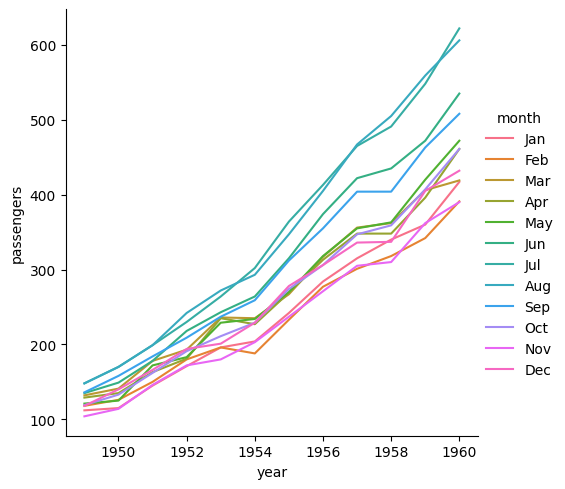

In [3]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

- Wide format data: For simple datasets, it is often more intuitive to think about data the way it might be viewed in a spreadsheet, where the columns and rows contain levels of different variables. For example, we can convert the flights dataset into a wide-form organization by “pivoting” it so that each column has each month’s time series over years:

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


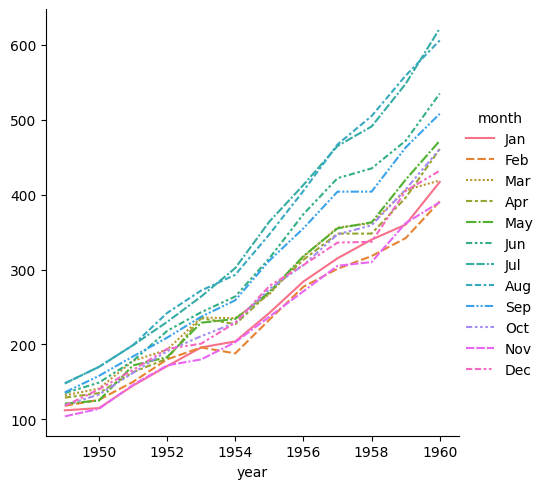

In [6]:
sns.relplot(data=flights_wide, kind="line")

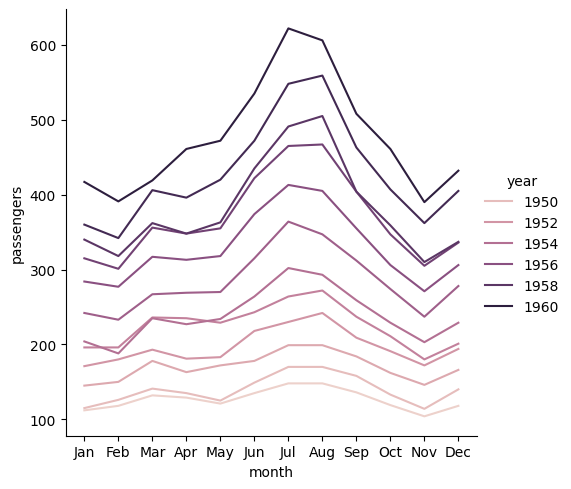

In [7]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

- To achieve the same remapping with the wide-form dataset, we would need to transpose the table:

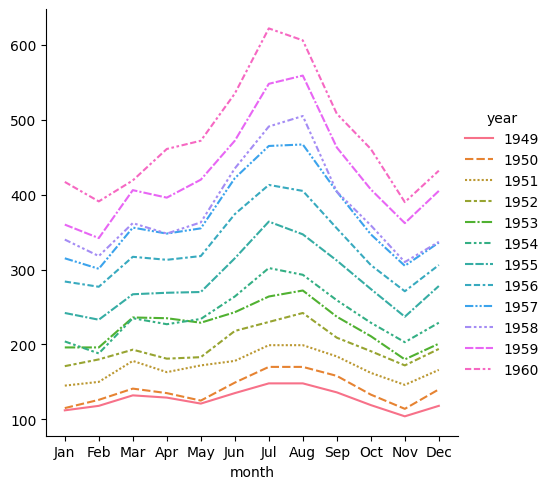

In [8]:
sns.relplot(data=flights_wide.transpose(), kind="line")

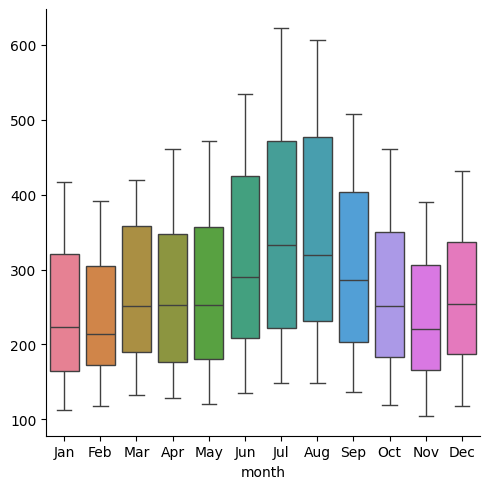

In [9]:
sns.catplot(data=flights_wide, kind="box")

### Messy data

- Many datasets cannot be clearly interpreted using either long-form or wide-form rules. If datasets that are clearly long-form or wide-form are “tidy”, we might say that these more ambiguous datasets are “messy”. In a messy dataset, the variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with repeated-measures data, where it is natural to organize a table such that each row corresponds to the unit of data collection. Consider this simple dataset from a psychology experiment in which twenty subjects performed a memory task where they studied anagrams while their attention was either divided or focused:

In [10]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [11]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


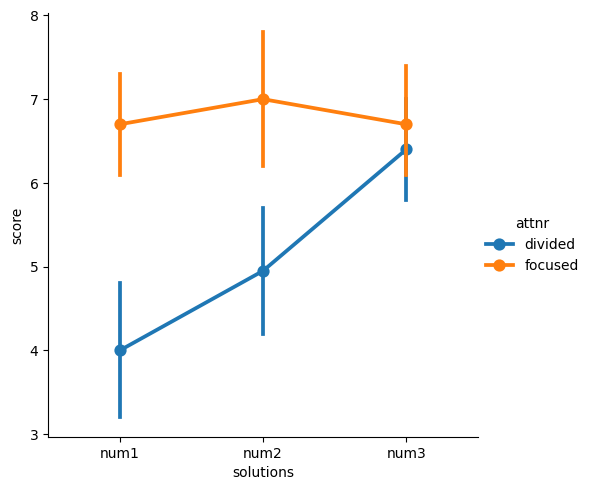

In [12]:
sns.catplot(anagrams_long, x="solutions", y="score", hue="attnr", kind='point')

### Options for visualizing long-form data

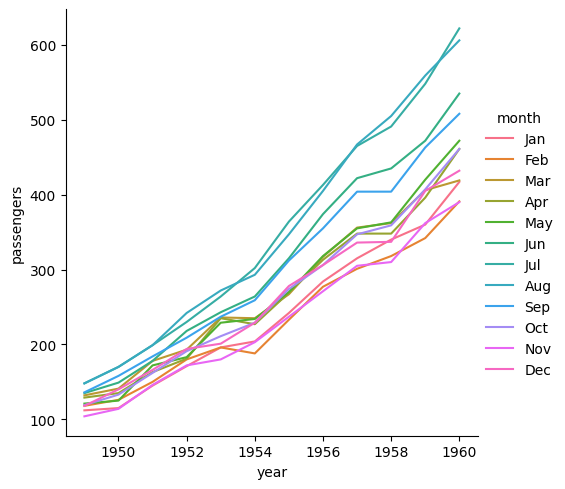

In [13]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

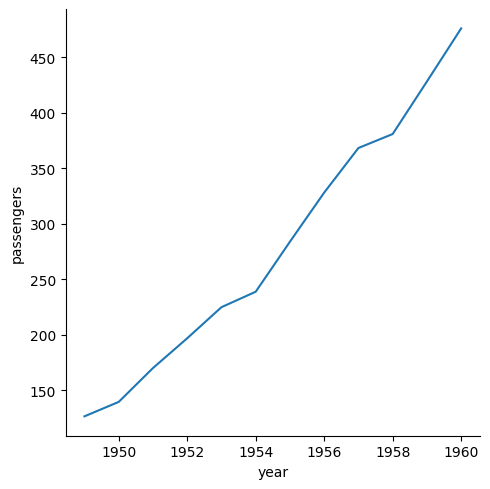

In [14]:
flights_avg = flights.groupby("year").mean(numeric_only=True)
sns.relplot(flights_avg, x="year", y="passengers", kind="line")

In [15]:
flights_avg.head()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000


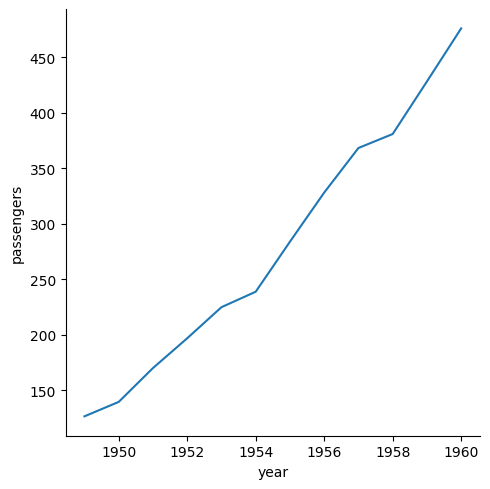

In [16]:
year = flights_avg.index
passengers = flights_avg['passengers']
sns.relplot(x=year, y=passengers, kind="line")

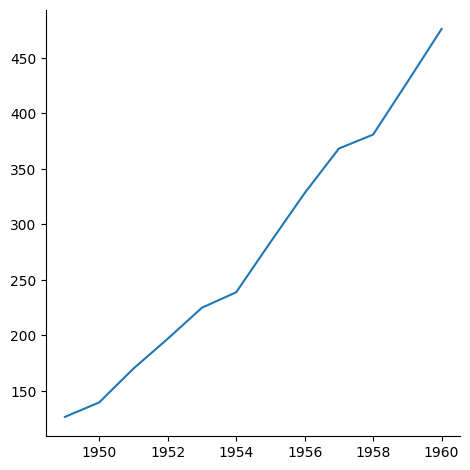

In [17]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

### Options for visualizing wide-form data

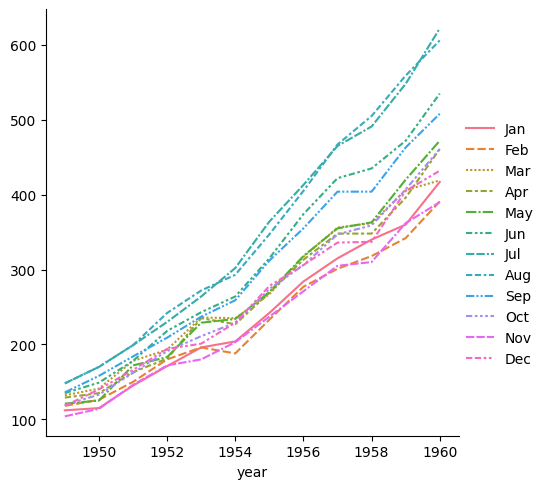

In [18]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

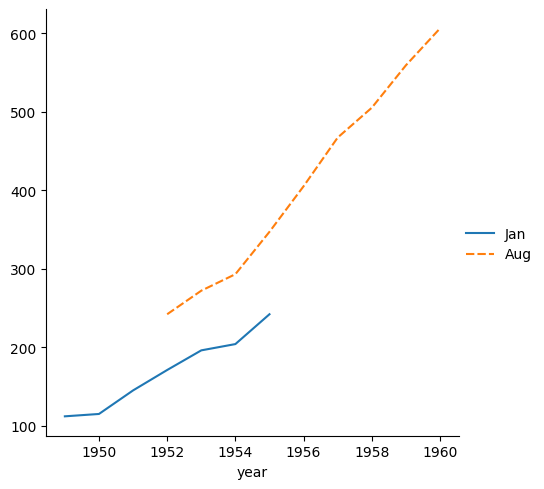

In [19]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line")

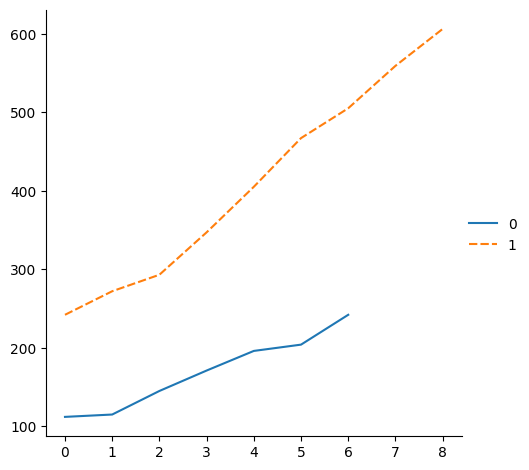

In [20]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

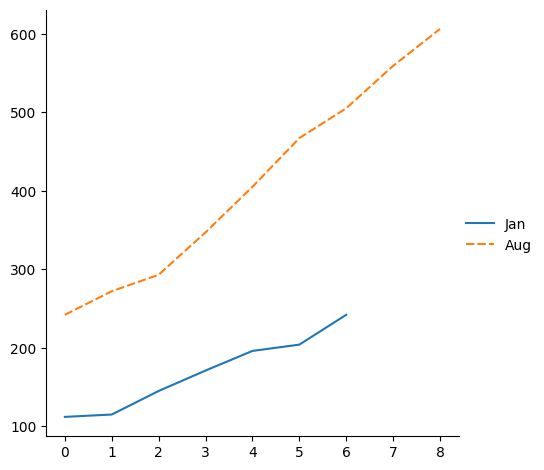

In [21]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

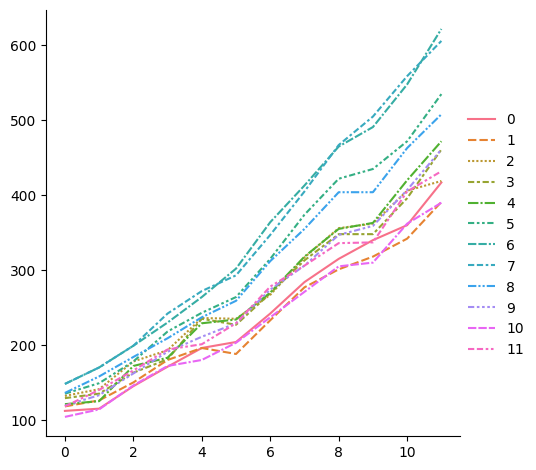

In [22]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")